# N12 Табличные данные

Автор: Шабанов Павел Александрович

Email: pa.shabanov@gmail.com

URL: [Заметки по программированию в науках о Земле](http://progeoru.blogspot.ru/)

Дата последнего обновления: 18.03.2017

### План

1. Табличные данные
    
2. Microsoft Excel (c) и python
    + xlrd;
    + xlwt
        + Запись на разных Листах.

### Цель: 

+ научиться работать с табличными данными, представленными форматам xls и xlsx.

## Табличные данные

Одним из самых удобных и распространённых типов массивов является двумерный массив. Он может быть представлен на плоскости в виде упорядоченной коллекции данных, имеющих координаты по двум осям. Трёхмерный массив может быть представлен в виде совокупности двумерных массивов. Четырёхмерный массив и далее N-мерный массив - в виде иерархической структуры (древа). Но самым понятным и доступным является именно матричный тип массивов. Имея две координаты для каждого элемента (**arr[i, j]**) такой набор отражается на самом деле ТРЁХМЕРНЫЙ набор данных: x, y, value. 

Такой набор данных может быть визуализирован как в виде трёхмерного рисунка, так и плоской "карты", отрисованой с помощью изолиний либо "псевдографики".

Двумерные массивы или матрицы - достаточно абстрактные типы данных. Представленные лишь некотороми данными они не содержат информации об осях. Матрица (40, 12) может быть просто набором псевдослучайных чисел, а может хранить месячные значения чего-либо (например, максимальную температуру воздуха) за 40 лет.

Для совместного хранения метаинформации и данных двумерных массивов удобно использовать таблицы. Примером электронной таблицы являются файлы **MS Excel (c)** с расширениями **xls** и **xlsx**.

## Microsoft Excel (c) & python

В стандартную библиотек не входят модули для работы с форматами MS Excel. Однако есть широко известные модули **xlrd** и **xlwt**, которые включены в дистрибутив Anaconda от Continuum Analitics. Первый отвечает за чтение данных из файлов формата xls/xlsx, а второй - за запись данных в файлы MS Excel.

Схема работы всех python-модулей при чтении данных из Excel выглядит примерно так:

1. Нужно указать путь к excel-файлу;

2. выбрать в открытом файле Лист (по умолчанию Sheet1);

3. указать ячейки, которые необходимо передать в объект-контейнер.


### xlrd

Рассмотрим формат xls на примере данных сайта [Earth Policy Institute](http://www.earth-policy.org/data_center/C23).

Файл "book_tgt_climate_2.xlsx" об индутриальных выбросах углекислого газ за 1990-2013 в формате XLS.

Логика использования этого модуля состоит в последовательном переходе с одного уровня на другой, более низкий: 

> Лист -> Строка/Столбец -> Ячейка.


In [19]:
# Открываем файл, создаём объект Книга и переходим на Лист
import os
import numpy as np
import xlrd

# I 
fileName = 'book_tgt_climate_2.xlsx' # имя и путь к файлу
iPath = './dataset/dat6/{}'.format(fileName)
wb = xlrd.open_workbook(iPath) # открываем файл и передаём его как объект Книга в wb
print type(wb)

# Методы sheet_names показывает список имён доступных для работы листов файла
sheets = wb.sheet_names()
print 'MS Excel sheets:', sheets
print type(sheets), len(sheets)

# II Передаём первый (и едиственный в данном случае) Лист как объект sh
sh = wb.sheet_by_name(sheets[0])   # sh - объект Лист
print type(sh)

<class 'xlrd.book.Book'>
MS Excel sheets: [u'Emissions by Fuel']
<type 'list'> 1
<class 'xlrd.sheet.Sheet'>


Таким образом, мы узнали, что в файле всего 1 нормальный лист с данными и перешли на этот лист для дальнейшей работы. Всего в файле два Листа, второй отдан под рисунок.

Перейдём к столбцам и стокам, узнаем сколько их доступно. Для этого есть атрибуты Листа **name**, **nrows** и **ncols**.

In [20]:
print 'Sheet name:',sh.name # выведем имя текущего листа
print 'Number of rows:',sh.nrows, 'Number of cells in choosed column:',len(sh.col(0)) # число строк разными способами
print 'Number of columns:', sh.ncols, 'Number of cells in choosed row:', len(sh.row(0)) # число столбцов разными способами

Sheet name: Emissions by Fuel
Number of rows: 127 Number of cells in choosed column: 127
Number of columns: 6 Number of cells in choosed row: 6


In [21]:
''' Передаём колонки в виде СПИСКОВ '''

xtime = sh.col_values(0) # Важно передать именно values. Иначе* будет передан список из особого класса ячеек Cells
cemis = sh.col_values(4) 

print type(cemis)
print cemis[:10]

# * ИНАЧЕ
cell = sh.col(0)[0]
print 'Type of cell', type(cell)
print 'XL_CELL_TEXT	1 (Unicode string):', cell.ctype
print 'Cell value:', cell.value

cell = sh.col(0)[5]
print 'XL_CELL_NUMBER 2 (float):', cell.ctype
print 'Cell value:', cell.value
print '----------------------------------------'

<type 'list'>
[u'', u'', u'Total', u'', u'', 534.0, 553.0, 566.0, 617.0, 624.0]
Type of cell <class 'xlrd.sheet.Cell'>
XL_CELL_TEXT	1 (Unicode string): 1
Cell value: Global Carbon Dioxide Emissions from Fossil Fuel Burning by Fuel Type, 1900-2013
XL_CELL_NUMBER 2 (float): 2
Cell value: 1900.0
----------------------------------------


Мы перенесли информацию из первого (индекс 0) и второго (индекс 3) столбцов файла в списки. Но мы считали "лишние ячейки" - "шапку" и "комментарии". 

Считаем только числовую информацию **ЯВНО** указав диапазон необходимых нам строк.

In [22]:
row1 = 6
row2 = 119
xtime = sh.col_values(0, row1, row2)

N = 3
arr = np.zeros((len(xtime), N))
labs = []
for i in range(N):
    arr[:, i] = sh.col_values(i + 1, row1, row2)
    cell = sh.row(2)[i + 1]   # это не значение, а ОБЪЕКТ Ячейка
    print i, type(cell), cell
    labs.append(cell.value)  # выбираем из объекта Ячейка значение (строка здесь)

0 <class 'xlrd.sheet.Cell'> text:u'Coal'
1 <class 'xlrd.sheet.Cell'> text:u'Oil'
2 <class 'xlrd.sheet.Cell'> text:u'Natural Gas'


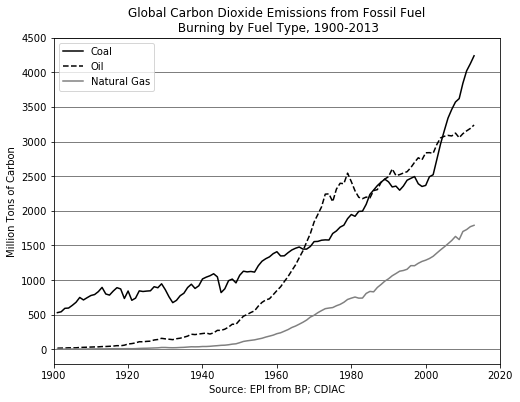

In [23]:
import matplotlib.pyplot as plt

lstyles = ['solid', 'dashed', 'solid']
colors = ['k', 'k', 'grey']
title = 'Global Carbon Dioxide Emissions from Fossil Fuel\n Burning by Fuel Type, 1900-2013'

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
for j in range(N):
    ax.plot(xtime, arr[:, j], color=colors[j], label=labs[j], ls=lstyles[j])
ax.set_xlabel('Source: EPI from BP; CDIAC')
ax.set_ylabel('Million Tons of Carbon')
ax.set_title(title)
ax.grid(axis='y', color='k', linestyle='-', linewidth=0.5)

ax.set_xlim(1900, 2020)
ax.set_yticks(range(0, 5000, 500))
ax.legend(loc=2)

fig.savefig('./pics/L12/{}_{:}_{:}.png'.format(title[:31], int(xtime[0]), int(xtime[-1])),
            format='png', dpi=200, bbox_inches='tight')
plt.show()

### xlwt

Обратный для модуля xlrd - xlwt позволяет записать данные в excel-таблицу.

Общая логика проста - для выбранного Листа в новом файле нужно указать номера (столбца/строки) ячеек и данные.

Про модуль xlwt подробнее можно почитать на сайте [python-excel.org](http://www.python-excel.org/).

In [24]:
import os
import numpy as np
from xlwt import Workbook

x = np.arange(27).reshape((9,3))*10.

# 1 Создаём экземпляр класса Workbook (типа файл-объект)
book = Workbook()

# 2 Добавляем новый Лист в созданный экземпляр Workbook с помощью метода add_sheet()
sheet = book.add_sheet('Sheet 1')

# 3 Функция enumerate возвращает номер итерации (индекс) и значения

debug = False
for row, array in enumerate(x):
    for col, value in enumerate(array):
        # 4 Записываем значения в ячейку, указывая номера её строки/столбца и значение
        if debug:
            print(row, col, value)
            
        sheet.write(row, col, value)   # запись значения value по индексам ячейки row, col

# 5 Сохраняем с помощью метода save() сформированный файл
iPath = './dataset/dat6/'
fileName = "test_wr_excel.xls"
cwd = os.getcwd()
os.chdir(iPath)
book.save(fileName)
os.chdir(cwd)

#### Запись на разных Листах

Если есть необходимость выписать матрицы на разные листы файла Excel, то можно сделать ещё один цикл по Листам. Например так, как это показано ниже.

Стоит отметить, что если необходимо выписать просто столбец-вектор, а не матрицу, то нужно делать "проверку на вектор" (см. ниже).

In [25]:
import os
import numpy as np
from xlwt import Workbook

xx = np.arange(27).reshape((9,3))*10.
yy = np.random.random(100).reshape((10,10))
zz = np.ones(15)

# Объединияем массивы в список xyz

xyz = [xx, yy, zz]
xyz_name = ['xx', 'yy', 'zz']

book = Workbook()

for i, x in enumerate(xyz):
    s = xyz_name[i]
    sheet = book.add_sheet(s)
    for row, array in enumerate(x):
        # Проверка на вектор. Если да, то
        if np.size(array) == 1:
            col = 0
            sheet.write(row, col, array)
        else:
            for col, value in enumerate(array):
                sheet.write(row, col, value)
cwd = os.getcwd()
iPath = './dataset/dat6/'
fileName = "test_wr_excel3.xls"
os.chdir(iPath)
book.save(fileName)
os.chdir(cwd)

Можно оформить данный код в виде функции, например, такой:

In [26]:
import numpy as np
from xlwt import Workbook


def wr_xls(x, name, debug=False):
    '''
    Saves matrix 'X' in 'name.xls' file

    Parameters
    ----------
    x : (numpy.ndarray)
        Input matrix (2D array)

    name : (str)
        The name of future xls file

    debug: (bool), optional

    Returns
    -------
    File : (xls)
        Xls file with matrix values in it
    '''
    book = Workbook()
    sheet = book.add_sheet('Sheet 1')

    for row, array in enumerate(x):
        if (debug):
            print (row, array)
        if(np.size(array) == 1):
            col = 0
            sheet.write(row, col, array)
        else:
            for col, value in enumerate(array):
                sheet.write(row, col, value)

    name = '{}.xls'.format(name)
    book.save(name)

N = 20
x = np.random.rand(N)

cwd = os.getcwd()
iPath = './dataset/dat6/'
fileName = "test_rand_excel"
os.chdir(iPath)
wr_xls(x, fileName)
os.chdir(cwd)